<a href="https://colab.research.google.com/github/earth516/WS_AI/blob/main/K_Means_%ED%81%B4%EB%9F%AC%EC%8A%A4%ED%84%B0%EB%A7%81_(%EC%98%88%EC%A0%9C_HR%EB%8F%84).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

K-Means 클러스터링 (예제_HR도).ipynb

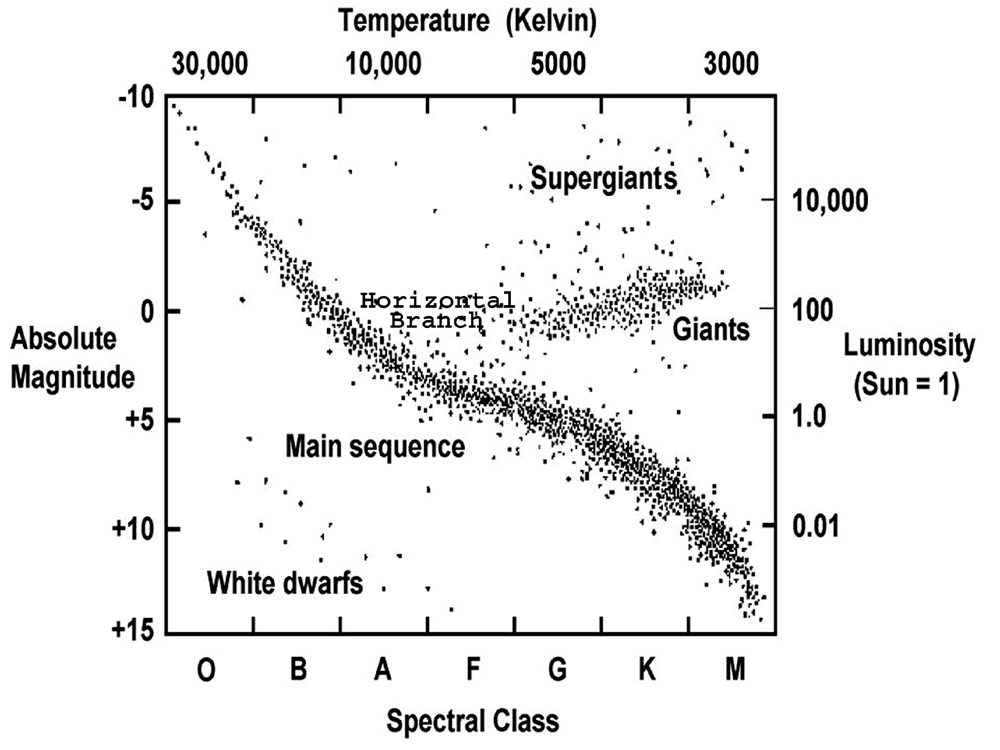

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

data = pd.read_csv('star1.csv')

# 데이터 준비
X = data[['Temperature (K)', 'Luminosity(L/Lo)', 'Radius(R/Ro)', 'Absolute magnitude(Mv)']]

# K-Means 클러스터링 k의 개수를 추측해보세요 -> 엘보포인트 활용하기
kmeans = KMeans(n_clusters=, random_state=42)
clusters = kmeans.fit_predict(X)

# 클러스터 결과를 데이터프레임에 추가
data['Cluster'] = clusters

# HR도 그리기
plt.figure(figsize=(10, 6))

# 클러스터 결과를 기반으로 시각화
scatter = plt.scatter(
    data['Temperature (K)'],
    data['Luminosity(L/Lo)'],
    c=data['Cluster'],
    cmap='viridis',
    s=50,
    alpha=0.7,
    edgecolors='k'
)

# X축: 온도 (역순), Y축: 광도
plt.xscale('log')
plt.gca().invert_xaxis()
plt.yscale('log')
plt.xlabel("Temperature (K)")
plt.ylabel("Luminosity (L/Lo)")
plt.title("HR Diagram with K-Means Clustering")
plt.colorbar(scatter, label='Cluster')
plt.grid(alpha=0.5, linestyle='--')

# HR도 표시
plt.show()


In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# 데이터 준비
X = data[['Temperature (K)', 'Luminosity(L/Lo)', 'Radius(R/Ro)', 'Absolute magnitude(Mv)']]

# 여러 k 값에 대해 WCSS 계산
wcss = []
k_range = range(1, 11)  # k=1부터 k=10까지 테스트
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)  # WCSS 값 저장

# Elbow Plot 생성
plt.figure(figsize=(8, 5))
plt.plot(k_range, wcss, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.title('Elbow Method for Optimal k')
plt.grid(True)
plt.show()
